In [1]:
from pysummarization.abstractablesemantics.re_seq_2_seq import ReSeq2Seq

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)
logger = getLogger("pysummarization")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)


In [3]:
document = """
An encyclopedia or encyclopædia is a reference work or compendium providing summaries of knowledge from either all branches or from a particular field or discipline.[1] Encyclopedias are divided into articles or entries that are often arranged alphabetically by article name[2] and sometimes by thematic categories. Encyclopedia entries are longer and more detailed than those in most dictionaries.[2] Generally speaking, unlike dictionary entries—which focus on linguistic information about words, such as their etymology, meaning, pronunciation, use, and grammatical forms—encyclopedia articles focus on factual information concerning the subject named in the article's title.[3][4][5][6]

Encyclopedias have existed for around 2,000 years and have evolved considerably since that time as to language (written in a major international or a vernacular language), size (few or many volumes), intent (presentation of a global or a limited range of knowledge), cultural perceptions (authoritative, ideological, didactic, utilitarian), authorship (qualifications, style), readership (education level, background, interests, capabilities), and the technologies available for their production and distribution (hand-written manuscripts, small or large print runs, internet production). As a valued source of reliable information compiled by experts, printed versions found a prominent place in libraries, schools and other educational institutions.

The appearance of digital and open-source versions in the 20th century has vastly expanded the accessibility, authorship, readership, and variety of encyclopedia entries and called into question the idea of what an encyclopedia is[citation needed] and the relevance of applying to such dynamic productions the traditional criteria for assembling and evaluating print encyclopedias.[citation needed]

Title page of Skalich's Encyclopaedia, seu orbis disciplinarum, tam sacrarum quam prophanarum, epistemon from 1559, first clear use of the word encyclopaedia in the title.[14]
Sixteenth century usage of the compounded word
In the sixteenth century there was a level of ambiguity as to how to use this new word. As several titles illustrate, there was not a settled notion about its spelling nor its status as a noun. For example: Jacobus Philomusus's Margarita philosophica encyclopaediam exhibens (1508); Johannes Aventinus's Encyclopedia orbisque doctrinarum, hoc est omnium artium, scientiarum, ipsius philosophiae index ac divisio; Joachimus Fortius Ringelbergius's Lucubrationes vel potius absolutissima kyklopaideia (1538, 1541); Paul Skalich's Encyclopaediae sen orbis disciplinarum epistemon (1559); Gregor Reisch's Margarita philosophica (1503, retitled Encyclopaedia in 1583); and Samuel Eisenmenger's Cyclopaedia Paracelsica (1585).[15] It is only with Pavao Skalić and his Encyclopediae seu orbis disciplinarum tam sacrarum quam profanarum epistemon (Encyclopaedia, or Knowledge of the World of Disciplines, Basel, 1559) that the term became first recognized as a noun.[citation needed]

There have been two examples of the oldest vernacular use of the compounded word. In approximately 1490, Franciscus Puccius wrote a letter to Politianus thanking him for his Miscellanea, calling it an encyclopedia.[16] More commonly, François Rabelais is cited for his use of the term in Pantagruel (1532).[17][18]

The suffix -p(a)edia
Several encyclopedias have names that include the suffix -p(a)edia, to mark the text as belonging to the genre of encyclopedias. For example, Banglapedia (on matters relevant for Bangladesh).

Contemporary usage
Today in English, the word is most commonly spelled encyclopedia, though encyclopaedia (from encyclopædia) is also used in Britain.[19]

Characteristics
The modern encyclopedia was developed from the dictionary in the 18th century. Historically, both encyclopedias and dictionaries have been researched and written by well-educated, well-informed content experts, but they are significantly different in structure. A dictionary is a linguistic work which primarily focuses on alphabetical listing of words and their definitions. Synonymous words and those related by the subject matter are to be found scattered around the dictionary, giving no obvious place for in-depth treatment. Thus, a dictionary typically provides limited information, analysis or background for the word defined. While it may offer a definition, it may leave the reader lacking in understanding the meaning, significance or limitations of a term, and how the term relates to a broader field of knowledge. An encyclopedia is, theoretically, not written in order to convince, although one of its goals is indeed to convince its reader of its own veracity.

To address those needs, an encyclopedia article is typically not limited to simple definitions, and is not limited to defining an individual word, but provides a more extensive meaning for a subject or discipline. In addition to defining and listing synonymous terms for the topic, the article is able to treat the topic's more extensive meaning in more depth and convey the most relevant accumulated knowledge on that subject. An encyclopedia article also often includes many maps and illustrations, as well as bibliography and statistics.

Four major elements define an encyclopedia: its subject matter, its scope, its method of organization, and its method of production:


"""

In [4]:
from pysummarization.nlp_base import NlpBase
from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer

In [5]:
nlp_base = NlpBase()
nlp_base.delimiter_list = [".", "\n"]
tokenizable_doc = SimpleTokenizer()
sentence_list = nlp_base.listup_sentence(document)
token_list = tokenizable_doc.tokenize(document)

In [6]:
sentence_list, len(sentence_list)

(['An encyclopedia or encyclopædia is a reference work or compendium providing summaries of knowledge from either all branches or from a particular field or discipline.\n',
  '[1] Encyclopedias are divided into articles or entries that are often arranged alphabetically by article name[2] and sometimes by thematic categories.\n',
  ' Encyclopedia entries are longer and more detailed than those in most dictionaries.\n',
  "[2] Generally speaking, unlike dictionary entries—which focus on linguistic information about words, such as their etymology, meaning, pronunciation, use, and grammatical forms—encyclopedia articles focus on factual information concerning the subject named in the article's title.\n",
  '[3][4][5][6]\n',
  'Encyclopedias have existed for around 2,000 years and have evolved considerably since that time as to language (written in a major international or a vernacular language), size (few or many volumes), intent (presentation of a global or a limited range of knowledge), 

In [7]:
len(list(set(token_list)))

438

In [8]:
token_arr = np.array(token_list)

In [9]:
from pysummarization.vectorizabletoken.t_hot_vectorizer import THotVectorizer

In [10]:
vectorizable_token = THotVectorizer(token_list=token_arr.tolist())

In [11]:
vector_list = vectorizable_token.vectorize(token_list=token_arr.tolist())
vector_arr = np.array(vector_list)

In [12]:
seq_len = 5

In [13]:
observed_list = []
for i in range(seq_len, vector_arr.shape[0]):
    observed_list.append(vector_arr[i-seq_len:i])
observed_arr = np.array(observed_list)
observed_arr.shape

(740, 5, 438)

In [14]:
observed_arr[0][-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
abstractable_semantics = ReSeq2Seq(
    margin_param=0.01,
    retrospective_lambda=0.5,
    retrospective_eta=0.5,
    encoder_decoder_controller=None,
    retrospective_encoder=None,
    input_neuron_count=observed_arr.shape[-1],
    hidden_neuron_count=256,
    weight_limit=0.5,
    dropout_rate=0.0,
    pre_learning_epochs=50,
    epochs=300,
    batch_size=20,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    seq_len=seq_len,
    bptt_tau=seq_len,
    test_size_rate=0.3,
    tol=0.0
)

In [16]:
abstractable_semantics.learn(observed_arr=observed_arr, target_arr=observed_arr)

Best params are updated.
Epoch: 1
Loss: 
Training: 7.5366161152215695e-06 Test: 7.206963244476084e-06
Epoch: 2
Loss: 
Training: 7.076976139012809e-06 Test: 7.717030423273437e-06
Epoch: 3
Loss: 
Training: 7.488040717247996e-06 Test: 7.345197743712686e-06
Epoch: 4
Loss: 
Training: 7.669642755198548e-06 Test: 7.642134875141052e-06
Epoch: 5
Loss: 
Training: 8.250027299920802e-06 Test: 7.581594525148616e-06
Epoch: 6
Loss: 
Training: 8.197951165548711e-06 Test: 8.298833627999947e-06
Epoch: 7
Loss: 
Training: 7.0645122512739215e-06 Test: 7.420590955491638e-06
Epoch: 8
Loss: 
Training: 7.721571222408615e-06 Test: 7.524957909433591e-06
Epoch: 9
Loss: 
Training: 7.58183618923588e-06 Test: 7.64711114823046e-06
Epoch: 10
Loss: 
Training: 7.198035049872308e-06 Test: 7.343511700322994e-06
Epoch: 11
Loss: 
Training: 7.851495350118408e-06 Test: 7.95078930305907e-06
Rolling mean of Loss (Window is 10): 
Training: 7.578520890494118e-06 Test: 7.572792615323051e-06
Epoch: 12
Loss: 
Training: 7.56559707700

Epoch: 6
Loss: 
Training: 3.1268264400707357 Test: 3.0743545966823884
Epoch: 7
Loss: 
Training: 3.0851088490751226 Test: 3.0650580594946426
Epoch: 8
Loss: 
Training: 3.0559065955854563 Test: 3.068666022467238
Epoch: 9
Loss: 
Training: 3.0681785143063167 Test: 3.0723398742270995
Epoch: 10
Loss: 
Training: 3.1359449261031522 Test: 3.107360050758676
Epoch: 11
Loss: 
Training: 3.069513001909195 Test: 3.110313022082274
Epoch: 12
Loss: 
Training: 3.091138679723429 Test: 3.095673103499065
Epoch: 13
Loss: 
Training: 3.0858286023931085 Test: 3.1173567199941687
Epoch: 14
Loss: 
Training: 3.080375166001022 Test: 3.083503065229912
Epoch: 15
Loss: 
Training: 3.0777262062051323 Test: 3.1224026945579073
Epoch: 16
Loss: 
Training: 3.0714681156461485 Test: 3.0982579887715485
Epoch: 17
Loss: 
Training: 3.0593222445064954 Test: 3.1669515365141616
Epoch: 18
Loss: 
Training: 3.0806338974317113 Test: 3.070180792718604
Epoch: 19
Loss: 
Training: 3.131831384745021 Test: 3.0439218491186386
Epoch: 20
Loss: 
Tra

Epoch: 119
Loss: 
Training: 2.797498035610478 Test: 5.776988572591602
Epoch: 120
Loss: 
Training: 5.054826607576423 Test: 1.9165163798855334
Epoch: 121
Loss: 
Training: 2.2056174538235624 Test: 4.331277622117004
Epoch: 122
Loss: 
Training: 5.300882903405719 Test: 5.853089700488404
Epoch: 123
Loss: 
Training: 5.9456565857082015 Test: 6.497532719133181
Epoch: 124
Loss: 
Training: 4.986550851272371 Test: 3.962392691579356
Epoch: 125
Loss: 
Training: 5.300156175590003 Test: 6.205446622448079
Epoch: 126
Loss: 
Training: 3.935104028872825 Test: 6.3476113705335315
Epoch: 127
Loss: 
Training: 5.131313565003766 Test: 5.973858257482974
Epoch: 128
Loss: 
Training: 5.496781440071592 Test: 6.046442107154044
Epoch: 129
Loss: 
Training: 5.799121161602876 Test: 6.342099622158363
Epoch: 130
Loss: 
Training: 6.748300197934072 Test: 4.191283179378419
Epoch: 131
Loss: 
Training: 6.0672823716711966 Test: 5.695897203796088
Epoch: 132
Loss: 
Training: 6.949129203914558 Test: 2.3737074064253854
Epoch: 133
Los

Epoch: 234
Loss: 
Training: 2.401250650875269 Test: 2.484326115791145
Epoch: 235
Loss: 
Training: 2.589570852946675 Test: 2.279441021412101
Epoch: 236
Loss: 
Training: 3.1865099423139673 Test: 2.3483711906575486
Epoch: 237
Loss: 
Training: 2.6941687846108398 Test: 2.366269142157127
Epoch: 238
Loss: 
Training: 3.39469876951412 Test: 2.2267735843606453
Epoch: 239
Loss: 
Training: 2.673886292637862 Test: 2.5345812077803775
Epoch: 240
Loss: 
Training: 2.570108861098862 Test: 2.8378968822786628
Epoch: 241
Loss: 
Training: 3.877303775114141 Test: 2.7355317403090127
Epoch: 242
Loss: 
Training: 2.8257070237447772 Test: 2.6365517502024804
Epoch: 243
Loss: 
Training: 3.140174401135417 Test: 2.621793280986365
Epoch: 244
Loss: 
Training: 2.9610854833407694 Test: 2.5342133787944654
Epoch: 245
Loss: 
Training: 2.9853915429894005 Test: 2.757177563912577
Epoch: 246
Loss: 
Training: 2.53151471518556 Test: 2.5439594702647863
Epoch: 247
Loss: 
Training: 2.997143920679611 Test: 2.433933755326745
Epoch: 24

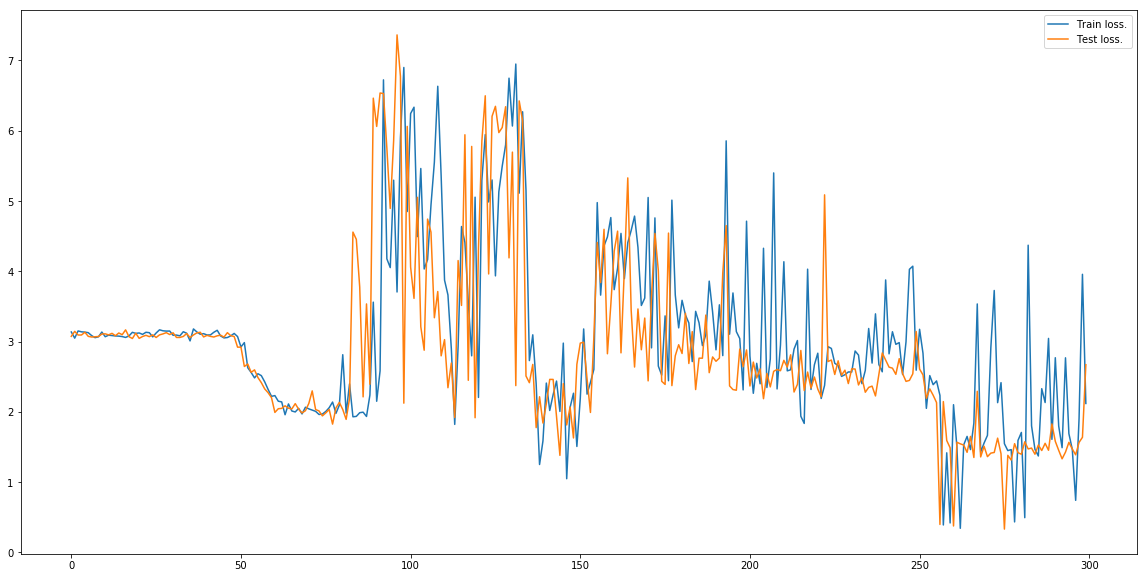

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(
    abstractable_semantics.logs_arr[:, 0],
    label="Train loss."
)
plt.plot(
    abstractable_semantics.logs_arr[:, 1],
    label="Test loss."
)
plt.legend()
plt.show()

In [18]:
abstract_list = abstractable_semantics.summarize(
    observed_arr,
    vectorizable_token,
    sentence_list,
    limit=5
)

In [19]:
for a in abstract_list:
    print(a)

 As a valued source of reliable information compiled by experts, printed versions found a prominent place in libraries, schools and other educational institutions.

 An encyclopedia article also often includes many maps and illustrations, as well as bibliography and statistics.

 For example: Jacobus Philomusus's Margarita philosophica encyclopaediam exhibens (1508); Johannes Aventinus's Encyclopedia orbisque doctrinarum, hoc est omnium artium, scientiarum, ipsius philosophiae index ac divisio; Joachimus Fortius Ringelbergius's Lucubrationes vel potius absolutissima kyklopaideia (1538, 1541); Paul Skalich's Encyclopaediae sen orbis disciplinarum epistemon (1559); Gregor Reisch's Margarita philosophica (1503, retitled Encyclopaedia in 1583); and Samuel Eisenmenger's Cyclopaedia Paracelsica (1585).



In [20]:
from pysummarization.vectorizabletoken.thotvectorizer.dbm_t_hot_vectorizer import DBMTHotVectorizer

In [21]:
token_arr = np.array(token_list)
vectorizable_token = DBMTHotVectorizer(token_list=token_arr.tolist())

In [22]:
vectorizable_token.pre_learn()

In [23]:
vector_list = vectorizable_token.vectorize(token_list=token_arr.tolist())
vector_arr = np.array(vector_list)

In [24]:
vector_arr.shape

(745, 100)

In [25]:
seq_len = 5

In [26]:
observed_list = []
for i in range(seq_len, vector_arr.shape[0]):
    observed_list.append(vector_arr[i-seq_len:i])
observed_arr = np.array(observed_list)
observed_arr.shape

(740, 5, 100)

In [27]:
abstractable_semantics = ReSeq2Seq(
    margin_param=0.01,
    retrospective_lambda=0.5,
    retrospective_eta=0.5,
    encoder_decoder_controller=None,
    retrospective_encoder=None,
    input_neuron_count=observed_arr.shape[-1],
    hidden_neuron_count=observed_arr.shape[-1],
    weight_limit=0.5,
    dropout_rate=0.0,
    pre_learning_epochs=50,
    epochs=500,
    batch_size=20,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    seq_len=seq_len,
    bptt_tau=seq_len,
    test_size_rate=0.3,
    tol=0.0
)

In [28]:
abstractable_semantics.learn(observed_arr=observed_arr, target_arr=observed_arr)

Best params are updated.
Epoch: 1
Loss: 
Training: 0.00022899432136314494 Test: 0.00018801861135448906
Epoch: 2
Loss: 
Training: 0.0001889714955544921 Test: 0.00015946688112090758
Best params are updated.
Epoch: 3
Loss: 
Training: 0.00022942373306953785 Test: 0.00018290032923128324
Epoch: 4
Loss: 
Training: 0.00019471751135459076 Test: 0.00019949974429308862
Best params are updated.
Epoch: 5
Loss: 
Training: 0.00026187490486704815 Test: 0.0001800492488535189
Epoch: 6
Loss: 
Training: 0.00020954841161559655 Test: 0.00018041846475125544
Epoch: 7
Loss: 
Training: 0.0002016502362904391 Test: 0.00021900069579012084
Best params are updated.
Epoch: 8
Loss: 
Training: 0.00028139196672017925 Test: 0.00018801012159847064
Epoch: 9
Loss: 
Training: 0.00016644923667503874 Test: 0.00014775963235220277
Epoch: 10
Loss: 
Training: 0.00021428765354363183 Test: 0.00022340099736475988
Epoch: 11
Loss: 
Training: 0.00022316444433123083 Test: 0.00019058550996642736
Rolling mean of Loss (Window is 10): 
Train

Epoch: 3
Loss: 
Training: 3.3513569829097434 Test: 3.278111758836772
Epoch: 4
Loss: 
Training: 3.3388728159985432 Test: 3.376994402185887
Epoch: 5
Loss: 
Training: 3.3102356115815477 Test: 3.3545954851220827
Epoch: 6
Loss: 
Training: 3.324586232138949 Test: 3.236422134488737
Epoch: 7
Loss: 
Training: 3.3143032012062905 Test: 3.365090194347293
Best params are updated.
Epoch: 8
Loss: 
Training: 3.255714111295345 Test: 3.3130882144480056
Epoch: 9
Loss: 
Training: 3.337318197460379 Test: 3.347483796860582
Epoch: 10
Loss: 
Training: 3.2846990502313522 Test: 3.2959049308322763
Epoch: 11
Loss: 
Training: 3.273022274554563 Test: 3.353867344555148
Epoch: 12
Loss: 
Training: 3.3554282365189794 Test: 3.269133529814649
Epoch: 13
Loss: 
Training: 3.3694445495020964 Test: 3.3434283294395284
Epoch: 14
Loss: 
Training: 3.267733625015833 Test: 3.359027654530108
Best params are updated.
Epoch: 15
Loss: 
Training: 3.2541302437758235 Test: 3.3320212294477636
Epoch: 16
Loss: 
Training: 3.305964398715101 Te

Epoch: 115
Loss: 
Training: 2.358864170681712 Test: 3.9378915160153354
Epoch: 116
Loss: 
Training: 1.7769537481802333 Test: 2.722014058605362
Epoch: 117
Loss: 
Training: 2.373144404462505 Test: 2.6020919702456045
Epoch: 118
Loss: 
Training: 2.745895485206144 Test: 1.7510692522543592
Epoch: 119
Loss: 
Training: 3.562705293913036 Test: 2.4167430893519244
Epoch: 120
Loss: 
Training: 1.7622011214242652 Test: 2.0396415551902374
Epoch: 121
Loss: 
Training: 1.5039646923470846 Test: 2.1986745985903133
Epoch: 122
Loss: 
Training: 2.6244455497531605 Test: 1.687348834774233
Epoch: 123
Loss: 
Training: 2.317323628211199 Test: 2.8748093937879453
Epoch: 124
Loss: 
Training: 1.735855415289406 Test: 1.9271022265204811
Epoch: 125
Loss: 
Training: 1.9655831146588603 Test: 2.020550184166671
Epoch: 126
Loss: 
Training: 1.903427315063561 Test: 2.1177220294680863
Epoch: 127
Loss: 
Training: 2.1487531517920813 Test: 1.9190200295765505
Epoch: 128
Loss: 
Training: 1.5265958635821306 Test: 1.9484821804521162
Ep

Epoch: 231
Loss: 
Training: 3.335871408974551 Test: 2.3579183440947658
Epoch: 232
Loss: 
Training: 2.746487395502956 Test: 2.9975794040779946
Epoch: 233
Loss: 
Training: 3.1173877020506415 Test: 3.3725255555934055
Epoch: 234
Loss: 
Training: 3.1143284830788014 Test: 3.359831629727848
Epoch: 235
Loss: 
Training: 2.64552676051911 Test: 4.653817314361714
Epoch: 236
Loss: 
Training: 3.6557419617753317 Test: 3.1559821286955985
Epoch: 237
Loss: 
Training: 3.032767918421282 Test: 2.4873124125901
Epoch: 238
Loss: 
Training: 3.0820683591719216 Test: 2.90606284575034
Epoch: 239
Loss: 
Training: 3.6631809805708873 Test: 3.470020965974657
Epoch: 240
Loss: 
Training: 2.849752766016107 Test: 2.8378347200984955
Epoch: 241
Loss: 
Training: 4.104765878268171 Test: 2.9950179186981973
Epoch: 242
Loss: 
Training: 2.598987995354935 Test: 3.074208626005847
Epoch: 243
Loss: 
Training: 2.320942294860877 Test: 3.311168882896148
Epoch: 244
Loss: 
Training: 3.0770627671144597 Test: 3.7648012777858835
Epoch: 245


Epoch: 347
Loss: 
Training: 2.8393151461186625 Test: 3.535197129798441
Epoch: 348
Loss: 
Training: 3.853226187451219 Test: 2.7404970738804155
Epoch: 349
Loss: 
Training: 2.4240707793442895 Test: 2.616037025622899
Epoch: 350
Loss: 
Training: 2.971289197513544 Test: 2.826303973380948
Epoch: 351
Loss: 
Training: 3.1208152577176245 Test: 2.72069853293885
Epoch: 352
Loss: 
Training: 3.0540762677589837 Test: 3.0776518805255875
Epoch: 353
Loss: 
Training: 3.59228183224369 Test: 4.206445970563285
Epoch: 354
Loss: 
Training: 3.2504027153496624 Test: 4.7041056219182975
Epoch: 355
Loss: 
Training: 3.2129619508656373 Test: 2.9594747974877964
Epoch: 356
Loss: 
Training: 3.199618937550083 Test: 3.1689261247622693
Epoch: 357
Loss: 
Training: 3.0927800486446317 Test: 4.02951907339215
/home/rum/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pysummarization/abstractablesemantics/re_seq_2_seq.py:697: RuntimeWarning: divide by zero encountered in true_divide
  decoded_arr = self.__encoder_dec

Epoch: 450
Loss: 
Training: 3.6344194845954667 Test: 2.0561181743475583
Epoch: 451
Loss: 
Training: 2.108452068137128 Test: 3.651896163600019
Epoch: 452
Loss: 
Training: 2.953490706422273 Test: 2.444637654780182
Epoch: 453
Loss: 
Training: 3.694901967640382 Test: 3.6536680542241737
Epoch: 454
Loss: 
Training: 3.4273425610731545 Test: 3.4097184952408583
Epoch: 455
Loss: 
Training: 4.5164963048534394 Test: 2.7394520559834317
Epoch: 456
Loss: 
Training: 3.574441828972657 Test: 4.357488274528713
Epoch: 457
Loss: 
Training: 2.392716778072627 Test: 4.103070852931275
Epoch: 458
Loss: 
Training: 3.181373057499728 Test: 3.4752994173147194
Epoch: 459
Loss: 
Training: 4.2406147309419175 Test: 4.216069888839068
Epoch: 460
Loss: 
Training: 3.079669540070661 Test: 4.8086234312847
Epoch: 461
Loss: 
Training: 4.858490636913425 Test: 2.9593923511647167
Epoch: 462
Loss: 
Training: 4.462275682712616 Test: 5.266197810659941
Epoch: 463
Loss: 
Training: 3.4223569691823155 Test: 4.6737553858782155
Epoch: 464

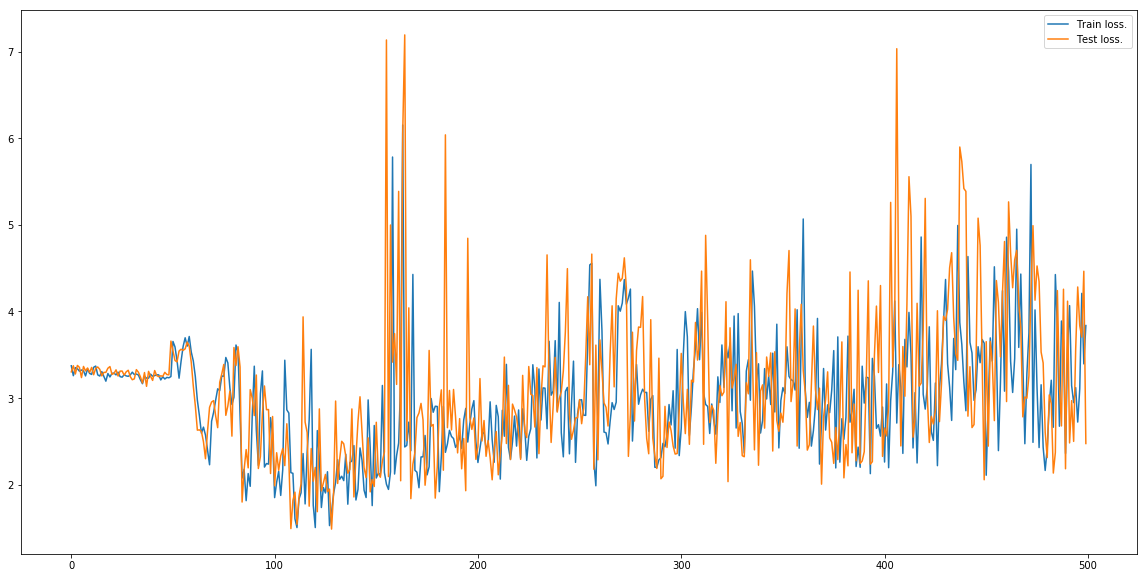

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(
    abstractable_semantics.logs_arr[:, 0],
    label="Train loss."
)
plt.plot(
    abstractable_semantics.logs_arr[:, 1],
    label="Test loss."
)
plt.legend()
plt.show()

In [30]:
abstract_list = abstractable_semantics.summarize(
    observed_arr,
    vectorizable_token,
    sentence_list,
    limit=5
)

/home/rum/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pysummarization/abstractablesemantics/re_seq_2_seq.py:697: RuntimeWarning: divide by zero encountered in true_divide
  decoded_arr = self.__encoder_decoder_controller.inference(observed_arr)
/home/rum/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pysummarization/abstractablesemantics/re_seq_2_seq.py:697: RuntimeWarning: invalid value encountered in true_divide
  decoded_arr = self.__encoder_decoder_controller.inference(observed_arr)
/home/rum/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/home/rum/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


In [31]:
for a in abstract_list:
    print(a)

 In addition to defining and listing synonymous terms for the topic, the article is able to treat the topic's more extensive meaning in more depth and convey the most relevant accumulated knowledge on that subject.

Encyclopedias have existed for around 2,000 years and have evolved considerably since that time as to language (written in a major international or a vernacular language), size (few or many volumes), intent (presentation of a global or a limited range of knowledge), cultural perceptions (authoritative, ideological, didactic, utilitarian), authorship (qualifications, style), readership (education level, background, interests, capabilities), and the technologies available for their production and distribution (hand-written manuscripts, small or large print runs, internet production).

 Thus, a dictionary typically provides limited information, analysis or background for the word defined.



In [32]:
a = [1, 2, 3]

In [33]:
a.pop(-1)

3

In [34]:
a

[1, 2]